**Curso: Data Science \
Desafio: API \
Fecha 11 de abril 2024 \
Alumno: Karim Singer \
Tutora: Maria Freiberger**

**Descripción del trabajo**

En relación al Dataset que estoy trabajando, encontré que la columna de PIB, tiene muchos datos faltantes. Busqué en la documentación de mi base de datos en "Our World in Data" y hacen referencia al "World Bank". Consulto si el World Bank tiene API y sí tiene. Por eso, consultaré la API del World Bank para encontrar más datos sobre PIB per capita. 

In [1]:
#Instalo la libreria necesaria del World Bank

!pip install wbgapi

In [2]:
# Importo las librerías a usar

import wbgapi as wb
import missingno as msno

In [3]:
# Consulto cómo solicitar la info de la API

help(wb.data.DataFrame)

Help on function DataFrame in module wbgapi.data:

DataFrame(series, economy='all', time='all', index=None, columns=None, mrv=None, mrnev=None, skipBlanks=False, labels=False, skipAggs=False, numericTimeKeys=False, timeColumns=False, params={}, db=None, **dimensions)
    Retrieve a 2-dimensional pandas dataframe. 
    
    Arguments:
        series:             a series identifier or list-like, e.g., SP.POP.TOTL
    
        economy:            an economy identifier or list-like, e.g., 'BRA' or ['USA', 'CAN', 'MEX']
    
        time:               a time identifier or list-like, e.g., 'YR2015' or range(2010,2020).
                            Both element keys and values are acceptable
    
        index:              name or list of dimensions for the DataFrame's index, e.g., 'economy'. If None then the function
                            will define the index based on your request. Note: to get a dataframe with no index
                            (i.e., 0-based integers) call `rese

In [4]:
# busco en los indicadores del World Bank data el código de GDP per capita

wb.search('GDP per capita')

ID,Name,Field,Value
NY.GDP.PCAP.CD,,IndicatorName,GDP per capita (current US$)
NY.GDP.PCAP.CD,,Longdefinition,...GDP per capita is gross domestic product divided by midyear population. GDP is the sum of...
NY.GDP.PCAP.CN,,IndicatorName,GDP per capita (current LCU)
NY.GDP.PCAP.CN,,Longdefinition,...GDP per capita is gross domestic product divided by midyear population. GDP is the sum of...
NY.GDP.PCAP.KD,,IndicatorName,GDP per capita (constant 2015 US$)
NY.GDP.PCAP.KD,,Longdefinition,...GDP per capita is gross domestic product divided by midyear population. GDP is the sum of...
NY.GDP.PCAP.KD.ZG,,IndicatorName,GDP per capita growth (annual %)
NY.GDP.PCAP.KD.ZG,,Longdefinition,...Annual percentage growth rate of GDP per capita based on constant local currency. GDP per capita is gross domestic product...
NY.GDP.PCAP.KN,,IndicatorName,GDP per capita (constant LCU)
NY.GDP.PCAP.KN,,Longdefinition,...GDP per capita is gross domestic product divided by midyear population. GDP at purchaser's...


voy a usar el primero pues es el PIB per Capita, normalizado al valor del USD actual.

In [5]:
# busco más información sobre el indicador

wb.series.metadata.get('NY.GDP.PCAP.CD')


Field,Value
Aggregationmethod,Weighted average
IndicatorName,GDP per capita (current US$)
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Longdefinition,GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.
Periodicity,Annual
Source,"World Bank national accounts data, and OECD National Accounts data files."
Statisticalconceptandmethodology,"For more information, see the metadata for current U.S. dollar GDP (NY.GDP.MKTP.CD) and total population (SP.POP.TOTL)."
Topic,Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators


In [6]:
# Hago la consulta del PIB per capita, entre los años 1960 a 2022

PIB = wb.data.DataFrame('NY.GDP.PCAP.CD', economy= 'all', time=range(1960,2022), labels=True)
print(PIB.head())

                       Country      YR1960      YR1961      YR1962  \
economy                                                              
ZWE                   Zimbabwe  276.643363  279.332656  275.966139   
ZMB                     Zambia  228.567399  216.274674  208.562685   
YEM                Yemen, Rep.         NaN         NaN         NaN   
PSE         West Bank and Gaza         NaN         NaN         NaN   
VIR      Virgin Islands (U.S.)         NaN         NaN         NaN   

             YR1963      YR1964      YR1965      YR1966      YR1967  \
economy                                                               
ZWE      277.532515  282.376856  294.893605  279.337779  295.056449   
ZMB      209.453362  236.941713  296.022427  334.672528  350.653425   
YEM             NaN         NaN         NaN         NaN         NaN   
PSE             NaN         NaN         NaN         NaN         NaN   
VIR             NaN         NaN         NaN         NaN         NaN   

           

In [7]:
# consulto los países y regiones descargados

PIB['Country'].unique()

array(['Zimbabwe', 'Zambia', 'Yemen, Rep.', 'West Bank and Gaza',
       'Virgin Islands (U.S.)', 'Viet Nam', 'Venezuela, RB', 'Vanuatu',
       'Uzbekistan', 'Uruguay', 'United States', 'United Kingdom',
       'United Arab Emirates', 'Ukraine', 'Uganda', 'Tuvalu',
       'Turks and Caicos Islands', 'Turkmenistan', 'Turkiye', 'Tunisia',
       'Trinidad and Tobago', 'Tonga', 'Togo', 'Timor-Leste', 'Thailand',
       'Tanzania', 'Tajikistan', 'Syrian Arab Republic', 'Switzerland',
       'Sweden', 'Suriname', 'Sudan', 'St. Vincent and the Grenadines',
       'St. Martin (French part)', 'St. Lucia', 'St. Kitts and Nevis',
       'Sri Lanka', 'Spain', 'South Sudan', 'South Africa', 'Somalia',
       'Solomon Islands', 'Slovenia', 'Slovak Republic',
       'Sint Maarten (Dutch part)', 'Singapore', 'Sierra Leone',
       'Seychelles', 'Serbia', 'Senegal', 'Saudi Arabia',
       'Sao Tome and Principe', 'San Marino', 'Samoa', 'Rwanda',
       'Russian Federation', 'Romania', 'Qatar', 'Puert

<Axes: >

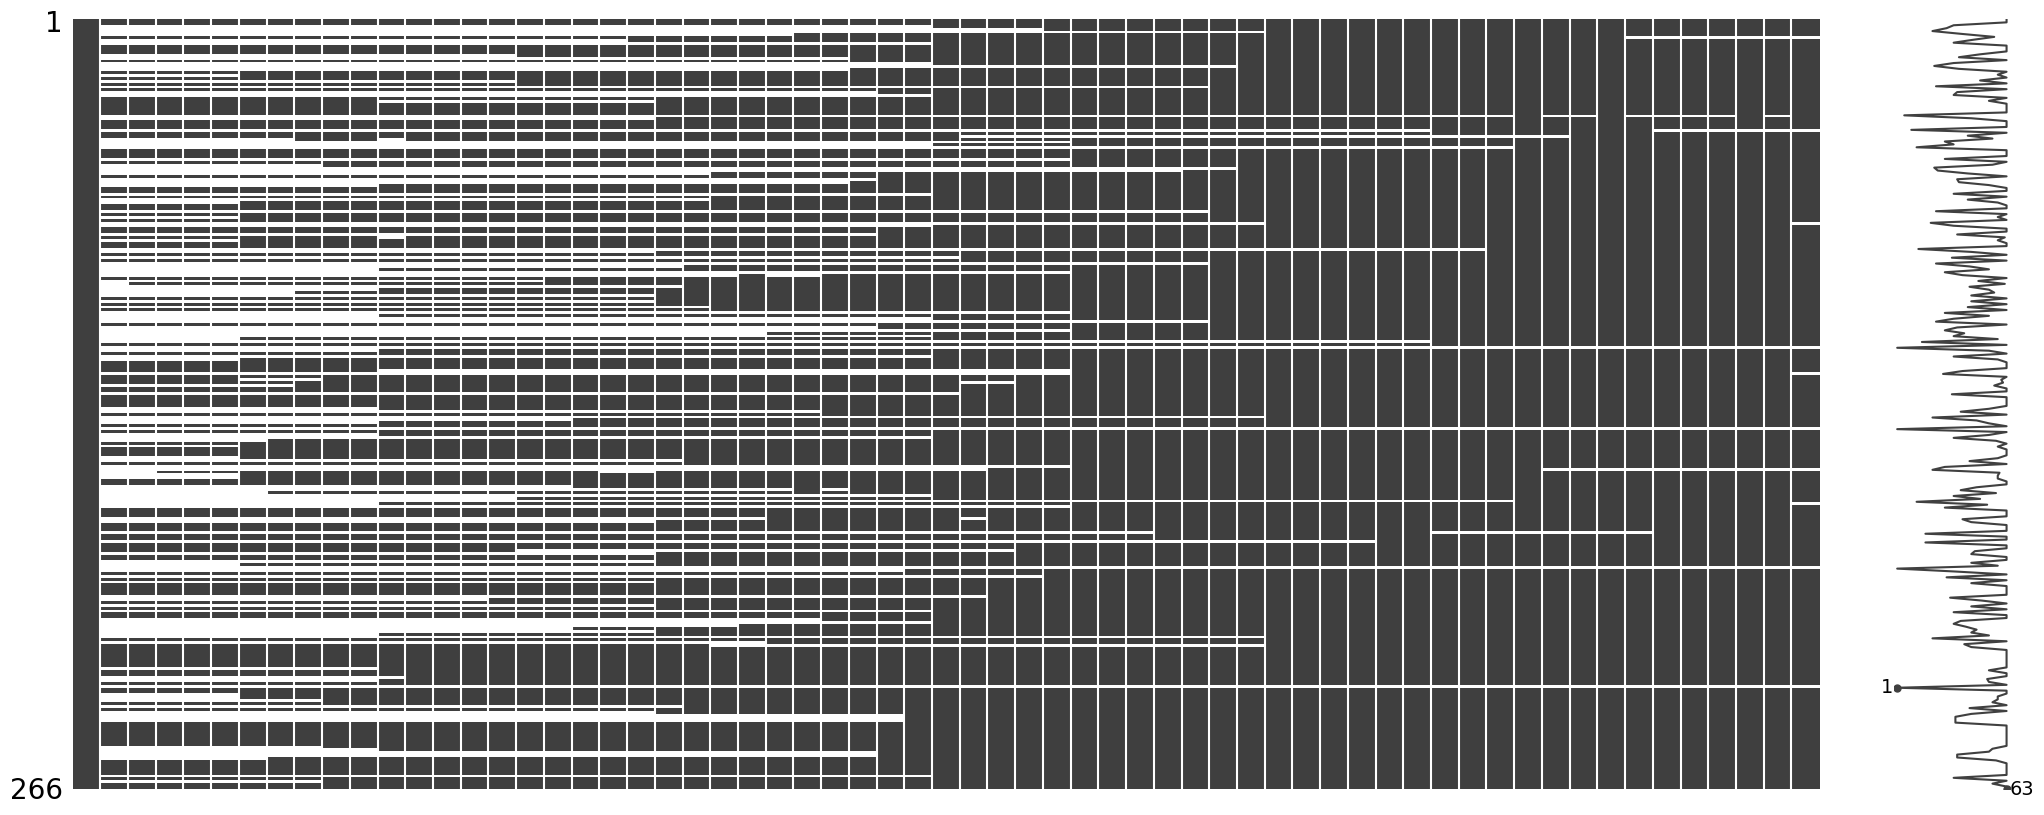

In [8]:
# Reviso visualmente los datos faltantes.

msno.matrix(PIB)

In [9]:
#Guardo la información en un archivo .csv

PIB.to_csv('PIB.csv')

**Conclusiones**

La base de datos del World Bank parece tener bastante más información que la base de datos que dispongo. Por lo que es probable que siga consultándola regularmente para el proyecto final.

Ahora voy a intentar un merge con el archivo original
